## Loan prediction

This project develops a machine learning model to predict whether a bank customer will be approved for a loan. The model is trained using the "Loan Dataset" from Kaggle, which includes various demographic and financial features. Additionally, we build a Streamlit application to provide a user-friendly interface for loan prediction.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Importing data
df = pd.read_csv('data/loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Handle missing values

imputer = SimpleImputer(strategy = 'mean')
df[['LoanAmount','Loan_Amount_Term','Credit_History']] = imputer.fit_transform(df[['LoanAmount','Loan_Amount_Term','Credit_History']])

In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# Convert categorical variables into numeric variables
label_encoders = {}
categorical_variables = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area', 'Loan_Status']
for column in categorical_variables:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

In [9]:
le.classes_

array(['N', 'Y'], dtype=object)

In [10]:
df.drop('Loan_ID',axis=1,inplace=True)

In [11]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


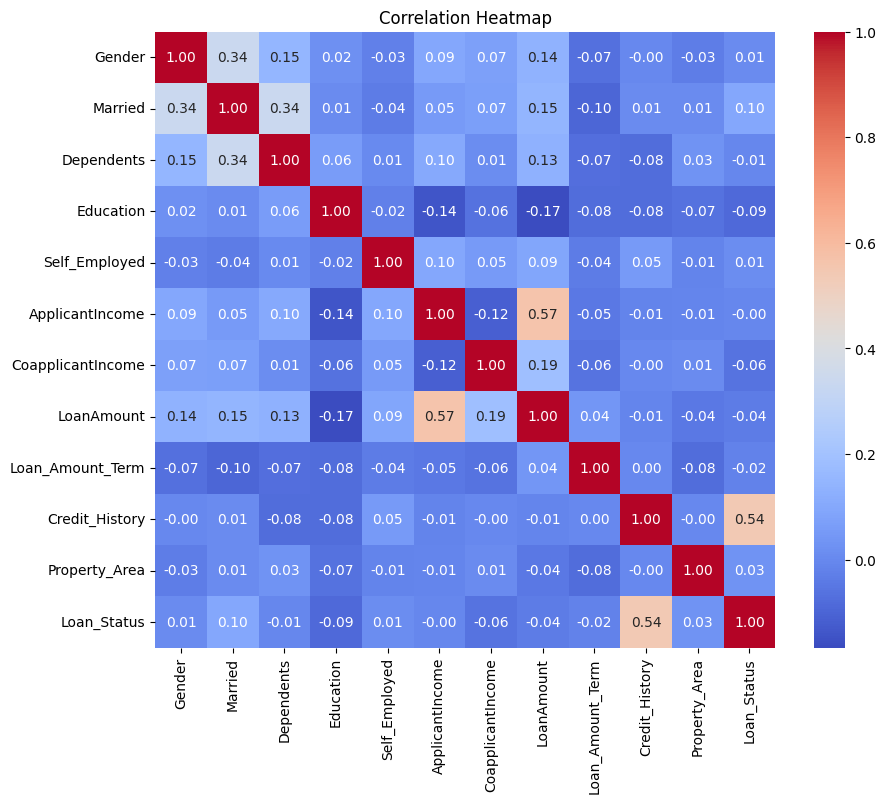

In [13]:
# Correlation
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data=corr,annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
X = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [15]:

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

features_df

,Feature,Importance
9,Credit_History,0.237812
5,ApplicantIncome,0.198353
7,LoanAmount,0.185753
6,CoapplicantIncome,0.119769
10,Property_Area,0.052981
2,Dependents,0.052216
8,Loan_Amount_Term,0.051276
1,Married,0.027417
3,Education,0.026320
4,Self_Employed,0.025990


In [17]:
y_pred = model.predict(X_test)

In [19]:
print('Model accuracy = ',accuracy_score(y_pred,y_test))
print('classification_report :',classification_report(y_pred,y_test))

Model accuracy =  0.8311688311688312
classification_report :               precision    recall  f1-score   support

           0       0.63      0.82      0.72        40
           1       0.93      0.83      0.88       114

    accuracy                           0.83       154
   macro avg       0.78      0.83      0.80       154
weighted avg       0.85      0.83      0.84       154



In [57]:
pickle.dump(model, open('ml_model', 'wb'))